# spotify

Use the "Run" button to execute the code.

In [5]:
pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/geomack/spotifyclassification'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maheshkumar0018
Your Kaggle Key: ··········


100%|██████████| 98.4k/98.4k [00:00<00:00, 494kB/s]

In [7]:
file_path = './spotifyclassification/data.csv'

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. [X] Top 5 most popular artist
2. [X] Top 5 loudest tracks
3. [X] Artist with most danceability songs
4. [X] Top 10 instrumentalness songs
5. [X] Multiple feature plots
#### Multiple feature plots
- tempo
- loudness
- acousticness
- danceability
- duration_ms
- energy
- instrumentalness
- liveness
- speechiness
- valence

## Self Assesment
- [X] Top 10 energetic Tracks
- [X] Most trending genre
- [X] Most common duration
- [X] Most popular artist
- [X] Top 10 tracks with most valence


## Load the data

In [9]:
spotify_df = pd.read_csv(file_path)
spotify_df.drop('Unnamed: 0',axis=1,inplace=True)
spotify_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


## Data Cleaning

In [ ]:
spotify_df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [ ]:
spotify_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [ ]:
spotify_df.shape

(2017, 16)

In [ ]:
spotify_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## Data Analysis 
1. Top 5 most popular artist

In [29]:
top_five_popular_artists = spotify_df.groupby('artist').count().sort_values(by='song_title',ascending = False)['song_title'][:5]
top_five_popular_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

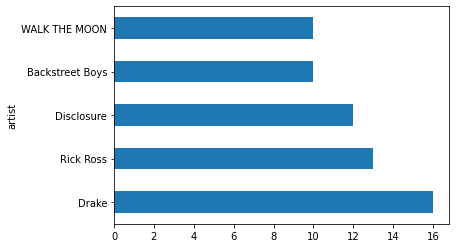

In [30]:
top_five_popular_artists.plot.barh()
plt.show()

#### 2.  Top 5 loudest tracks

In [ ]:
top_five_loudest_tracks = spotify_df[['loudness','song_title']].sort_values(by='loudness',ascending=True)[:5]
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


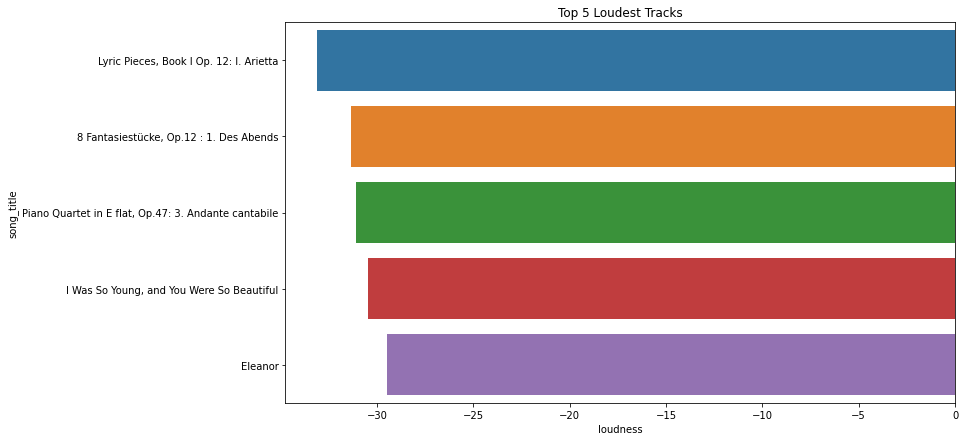

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='loudness',y='song_title',data=top_five_loudest_tracks)
plt.title("Top 5 Loudest Tracks")
plt.show()

#### 3. Artist with most danceability songs

In [ ]:
artist_with_most_danceability_songs = spotify_df[['danceability','song_title','artist']].sort_values(by='danceability',ascending=False)[:5]
artist_with_most_danceability_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


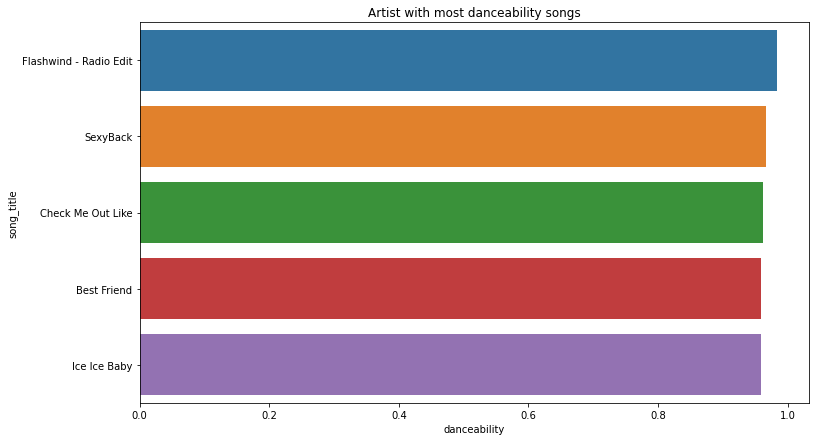

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='danceability',y='song_title',data=artist_with_most_danceability_songs)
plt.title('Artist with most danceability songs')
plt.show()

#### 4. Top 10 instrumentalness songs

In [ ]:
top_ten_instrumentalness_songs = spotify_df[['instrumentalness','song_title','artist']].sort_values(by='instrumentalness',ascending=False)[:10]
top_ten_instrumentalness_songs

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


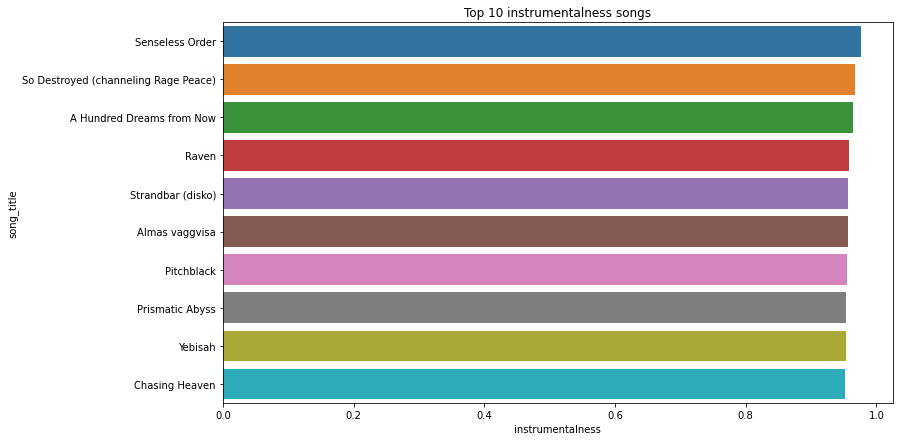

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='instrumentalness',y='song_title',data=top_ten_instrumentalness_songs)
plt.title('Top 10 instrumentalness songs')
plt.show()

#### 4. Top 10 instrumentalness songs

In [14]:
top_ten_instrumentalness_songs = spotify_df[['instrumentalness','song_title','artist']].sort_values(by='instrumentalness',ascending=False)[:5]
top_ten_instrumentalness_songs

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


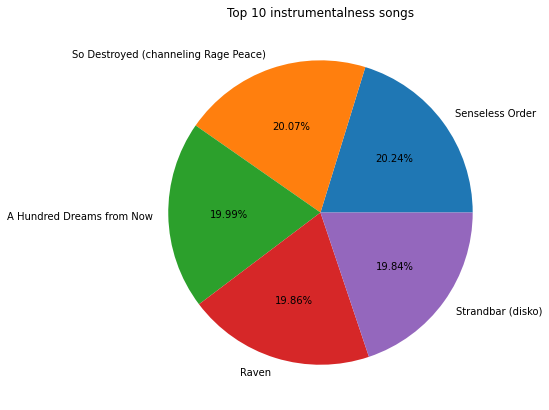

In [ ]:
plt.figure(figsize=(12,7))
plt.pie(x='instrumentalness',data=top_ten_instrumentalness_songs,autopct='%1.2f%%',labels=top_ten_instrumentalness_songs.song_title)
plt.title('Top 10 instrumentalness songs')
plt.show()

#### 5. Multiple feature plots

In [ ]:
interested_columns = ['tempo','loudness','acousticness','danceability','duration_ms',
                      'energy','instrumentalness','liveness','speechiness','valence']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


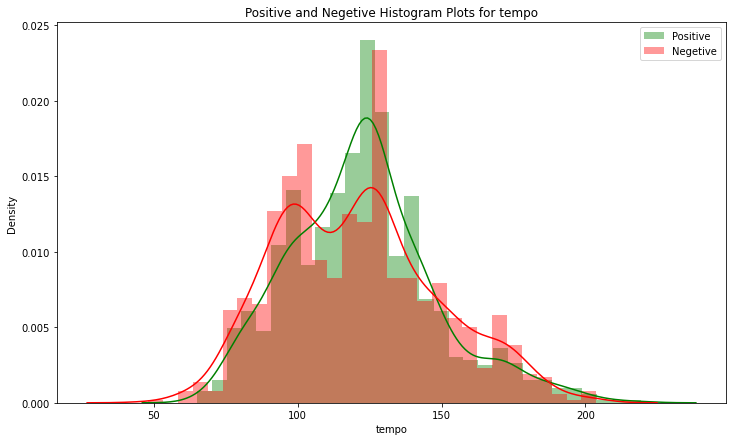

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


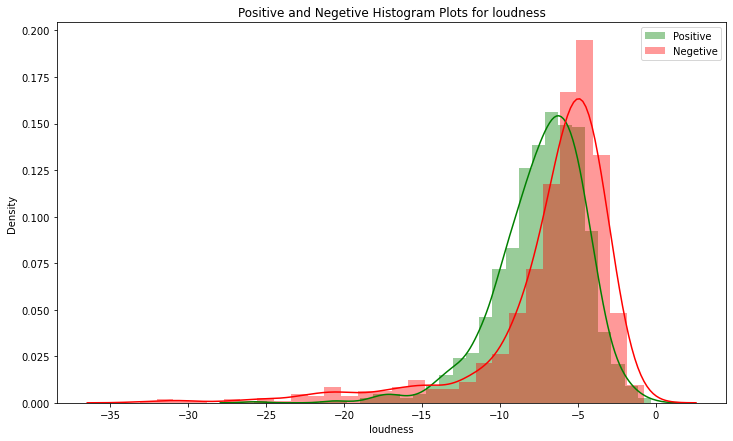

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


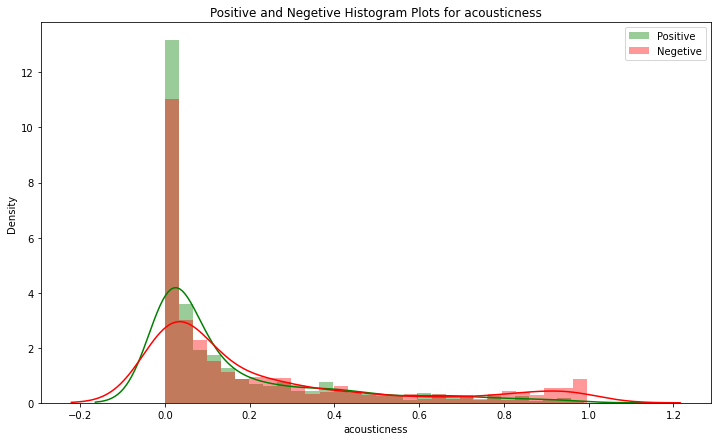

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


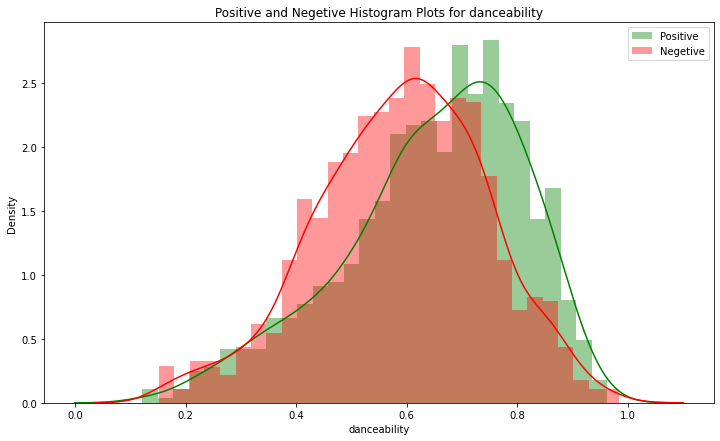

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


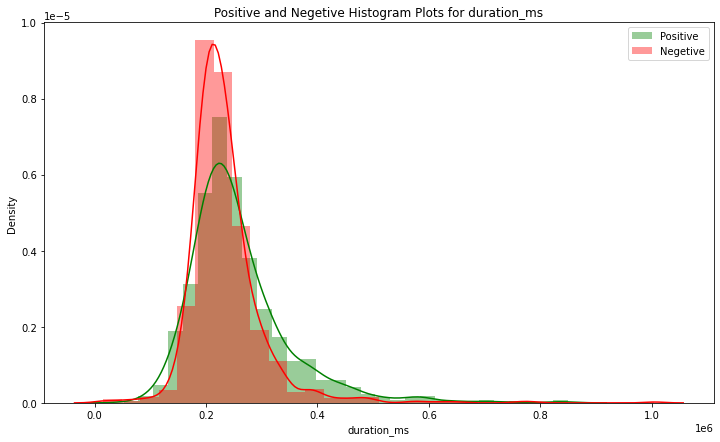

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


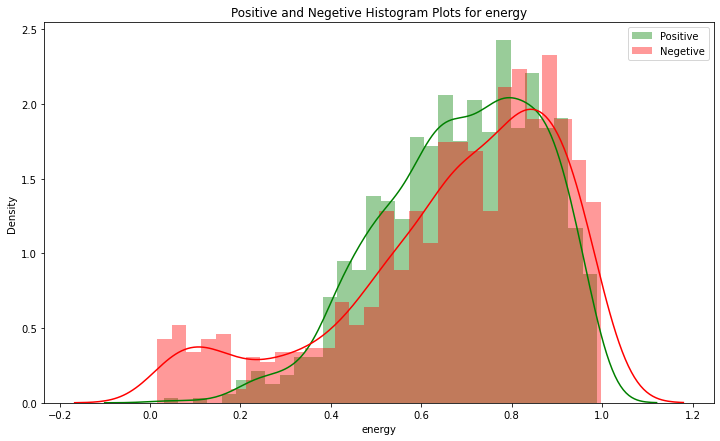

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


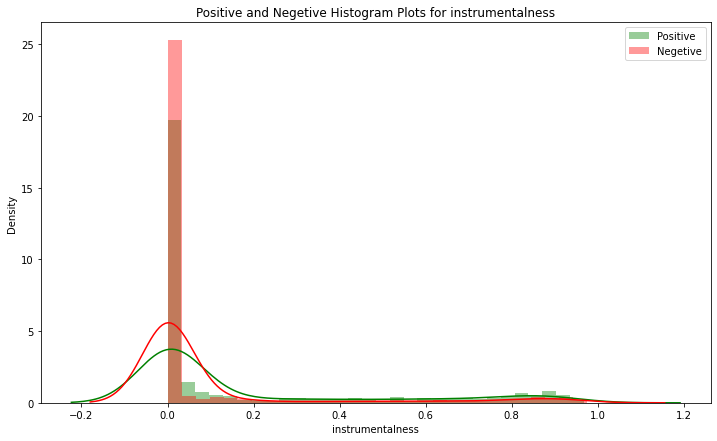

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


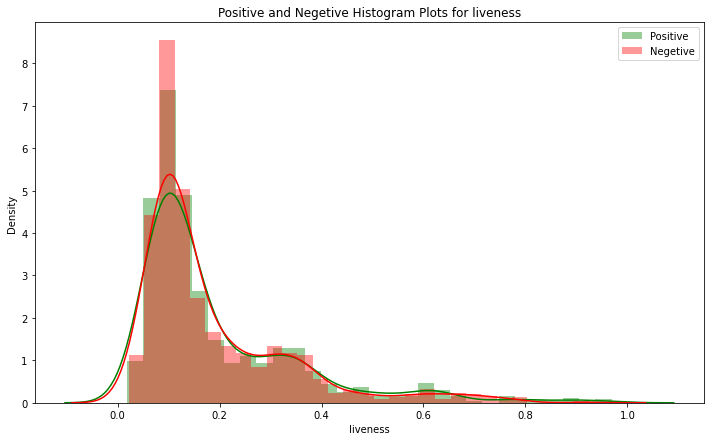

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


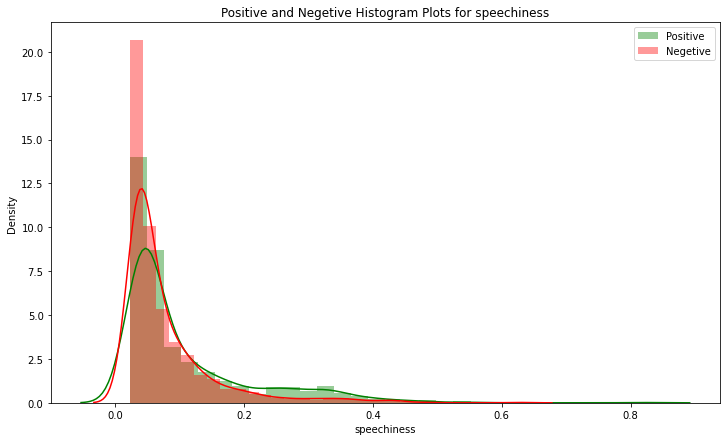

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


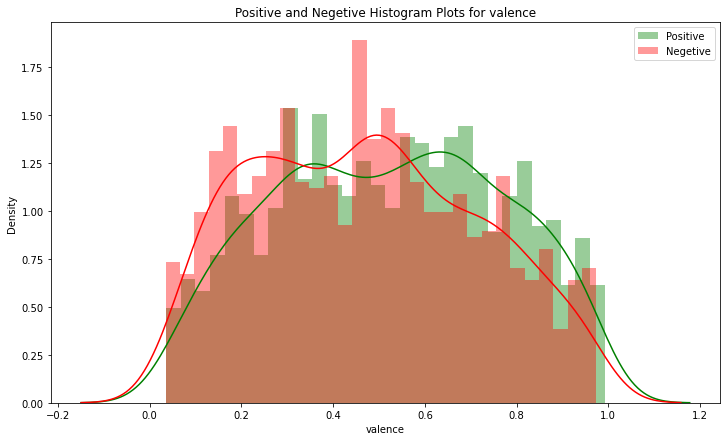

In [ ]:
for feature_col in interested_columns:
  pos_data = spotify_df[spotify_df['target']==1][feature_col]
  neg_data = spotify_df[spotify_df['target']==0][feature_col]

  plt.figure(figsize=(12,7))
  sns.distplot(pos_data,bins=30,label="Positive",color='green')
  sns.distplot(neg_data,bins=30,label="Negetive",color='red')
  plt.legend(loc = 'upper right')
  plt.title(f'Positive and Negetive Histogram Plots for {feature_col}')
  plt.show()

### Self Assessment
1. Top 10 energetic Tracks

In [15]:
top_ten_energetic_tracks = spotify_df[['energy','song_title','artist']].sort_values(by='energy',ascending=False)[:10]
top_ten_energetic_tracks

,energy,song_title,artist
1299,0.998,No Absolution,Thy Art Is Murder
1322,0.997,Pitchblack,Walking Dead On Broadway
1297,0.994,A Darkened Gospel,A Wake in Providence
1347,0.993,Unanswered,Suicide Silence
2015,0.992,First Contact,Twin Moons
1680,0.992,Paranoia,A Day To Remember
1332,0.992,Beautiful Agony,Within The Ruins
1328,0.991,Down into the Abyss,Conjonctive
1681,0.990,Hated,Beartooth
1296,0.990,Black Colors,Victim Of Deception


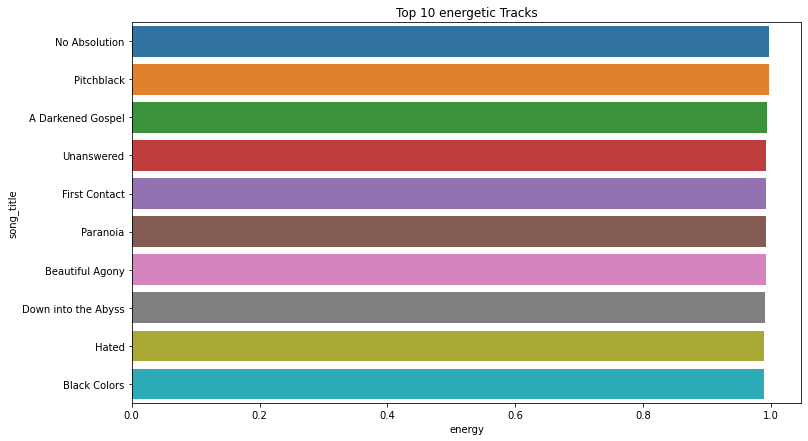

In [16]:
plt.figure(figsize=(12,7))
sns.barplot(x='energy',y='song_title',data=top_ten_energetic_tracks)
plt.title('Top 10 energetic Tracks')
plt.show()

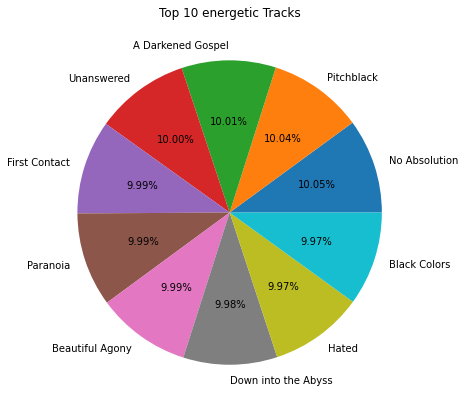

In [17]:
plt.figure(figsize=(12,7))
plt.pie(x='energy',data=top_ten_energetic_tracks,autopct='%1.2f%%',labels=top_ten_energetic_tracks.song_title)
plt.title('Top 10 energetic Tracks')
plt.show()

#### 2. Most trending genre

In [18]:
most_trending=spotify_df["song_title"].value_counts(ascending=False)[:10]
most_trending=pd.DataFrame(most_trending).reset_index()
most_trending=most_trending.rename(columns={"index":"Songs","song_title":"Count"})
most_trending

,Songs,Count
0,River,3
1,Jack,3
2,Mask Off,2
3,Be My Baby,2
4,Oblivion,2
5,Obedear,2
6,Swimming Pools (Drank) - Extended Version,2
7,Pyramids,2
8,1-800-273-8255,2
9,Midnight City,2


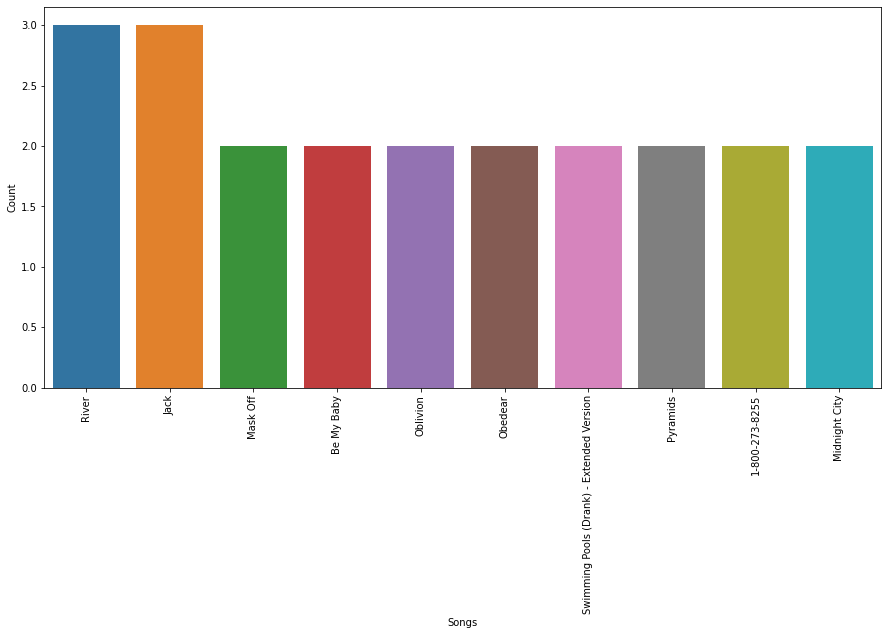

In [19]:
plt.figure(figsize=(15,7))
sns.barplot(x="Songs",y="Count",data=most_trending)
plt.xticks(rotation=90)
plt.show()

#### 3. Most common duration

In [20]:
most_common_duration = spotify_df['duration_ms'].value_counts()[:10]
most_common_duration

192000    5
243493    3
206013    3
228467    3
240000    3
189333    2
252053    2
243800    2
199973    2
254360    2
Name: duration_ms, dtype: int64

In [21]:
most_common_duration=pd.DataFrame(most_common_duration).reset_index()
most_common_duration=most_common_duration.rename(columns={"index":"Time_ms","duration_ms":"Count"})
most_common_duration

,Time_ms,Count
0,192000,5
1,243493,3
2,206013,3
3,228467,3
4,240000,3
5,189333,2
6,252053,2
7,243800,2
8,199973,2
9,254360,2


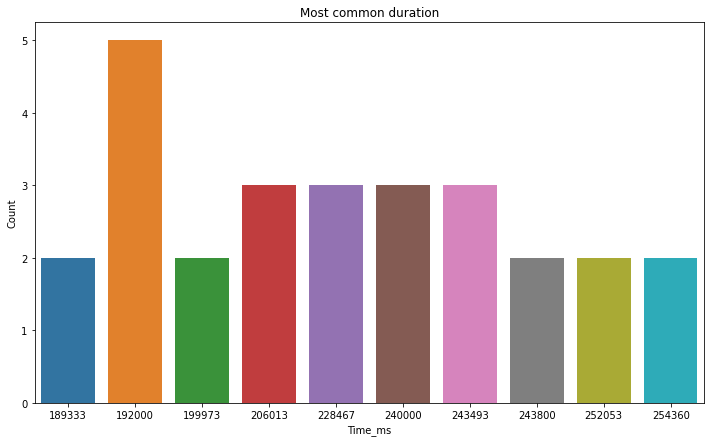

In [22]:
plt.figure(figsize=(12,7))
sns.barplot(x='Time_ms',y='Count',data=most_common_duration)
plt.title('Most common duration')
plt.show()

#### 4. Most popular artists

In [31]:
popular_artist=spotify_df["artist"].value_counts()[:11]
popular_artist=pd.DataFrame(popular_artist).reset_index()
popular_artist=popular_artist.rename(columns={"index":"Artists","artist":"Count"})
popular_artist

,Artists,Count
0,Drake,16
1,Rick Ross,13
2,Disclosure,12
3,WALK THE MOON,10
4,Backstreet Boys,10
5,Crystal Castles,9
6,FIDLAR,9
7,Future,8
8,Fall Out Boy,8
9,Skrillex,8


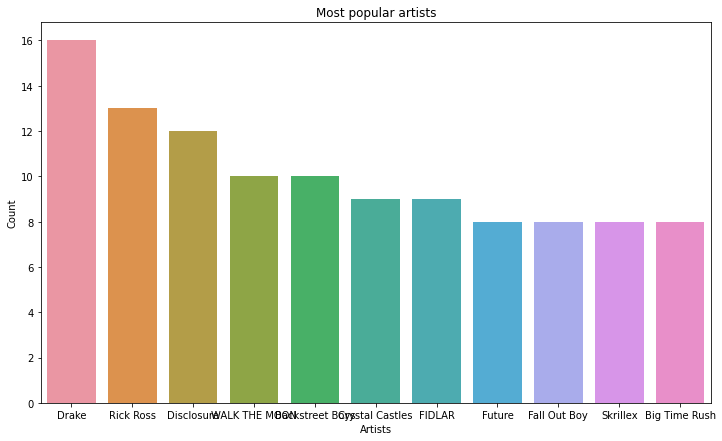

In [32]:
plt.figure(figsize=(12,7))
sns.barplot(x='Artists',y='Count',data=popular_artist)
plt.title('Most popular artists')
plt.show()

#### 5. Top 10 tracks with most valence

In [34]:
top_ten_valence_tracks = spotify_df[['valence','song_title','artist']].sort_values(by='valence',ascending=False)[:10]
top_ten_valence_tracks

,valence,song_title,artist
460,0.992,Abataka - Original Mix,Ida Engberg
912,0.975,I'm Walkin' - 2002 Digital Remaster,Fats Domino
1966,0.974,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)",Polina
207,0.973,Look at You,George McCrae
48,0.973,Azon de ma gnin kpevi,T. P. Orchestre Poly-Rythmo
337,0.972,Let's Lovedance Tonight - Danny Krivit Re-edit...,Gary's Gang
1590,0.972,Jelly On A Plate,The Kids Band
838,0.971,Let's Lovedance Tonight - Danny Krivit Re-edit...,Gary's Gang
497,0.968,Mi Swing es Tropical,Nickodemus
112,0.967,Please Mr. Postman,The Marvelettes


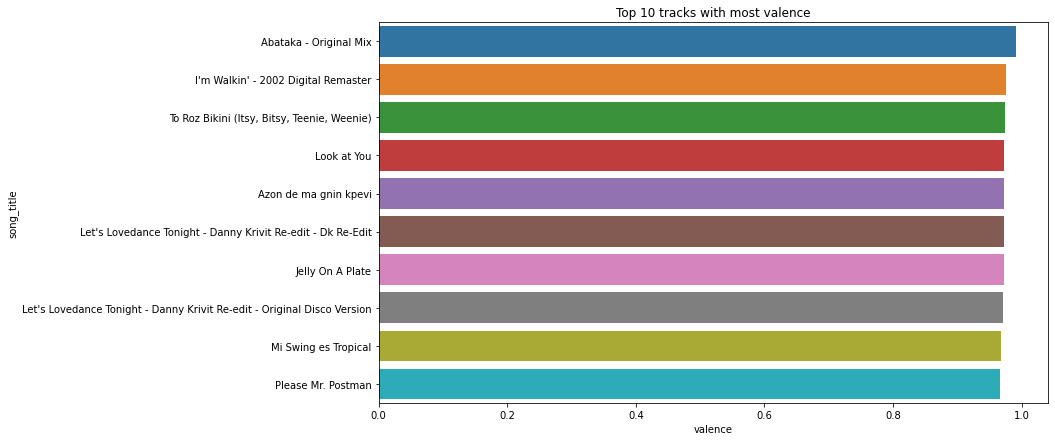

In [35]:
plt.figure(figsize=(12,7))
sns.barplot(x='valence',y='song_title',data=top_ten_valence_tracks)
plt.title('Top 10 tracks with most valence')
plt.show()